# NBA Trends

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr, chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

np.set_printoptions(suppress=True, precision=2)

In [ ]:
nba = pd.read_csv('nba_games.csv')

nba_2010 = nba[nba.year_id == 2010]
nba_2014 = nba[nba.year_id == 2014]

**Data Explaination:**   
from [here](https://github.com/fivethirtyeight/data/tree/master/nba-elo)

| Column Name | Description |
| --- | --- |
| `game_id` | Unique ID for each game |
| `year_id` | Season id, named based on year in which the season ended |
| `fran_id` | Franchise id. Multiple team_ids can fall under the same `fran_id` due to name changes or moves. Interactive is grouped by `fran_id`. |
| `opp_fran` | Franchise id of opponent |
| `game_location` | Home (`H`), away (`A`), or neutral (`N`) |
| `is_playoffs` | Flag for playoff games, `1` if `True`, `0` if `False` |
| `pts` | Points scored by team |
| `opp_pts` | 	Points scored by opponent |
| `game_result` | Win (`W`) or loss (`L`) for team in the `fran_id` column |
| `forecast` | Elo-based chances of winning for the team in the `fran_id` column, based on elo ratings and game location |
| `point_diff` | Point differential between `fran_id` and `opp_fran` |

In [4]:
nba_2010.head()

,game_id,year_id,fran_id,opp_fran,game_location,is_playoffs,pts,opp_pts,game_result,forecast,point_diff
21717,200910270CLE,2010,Celtics,Cavaliers,A,0,95,89,W,0.277472,6
21718,200910280BOS,2010,Celtics,Hornets,H,0,92,59,W,0.814619,33
21719,200910280MIA,2010,Knicks,Heat,A,0,93,115,L,0.258755,-22
21720,200910280MIN,2010,Nets,Timberwolves,A,0,93,95,L,0.475155,-2
21721,200910280OKC,2010,Thunder,Kings,H,0,102,89,W,0.716764,13


In [5]:
nba_2014.head()

,game_id,year_id,fran_id,opp_fran,game_location,is_playoffs,pts,opp_pts,game_result,forecast,point_diff
23468,201310300CLE,2014,Nets,Cavaliers,A,0,94,98,L,0.611981,-4
23469,201310300NYK,2014,Knicks,Bucks,H,0,90,83,W,0.793150,7
23470,201310300SAS,2014,Spurs,Grizzlies,H,0,101,94,W,0.692980,7
23471,201310300TOR,2014,Celtics,Raptors,A,0,87,93,L,0.361233,-6
23472,201310300UTA,2014,Thunder,Jazz,A,0,101,98,W,0.526056,3


#### 1.

The data has been subsetted for you into two smaller datasets: games from 2010 (named `nba_2010`) and games from 2014 (named `nba_2014`). To start, let’s focus on the 2010 data.

Suppose you want to compare the knicks to the nets with respect to points earned per game. Using the `pts` column from the `nba_2010` DataFrame, create two series named `knicks_pts_10` (`fran_id = "Knicks"`) and `nets_pts_10`(`fran_id = "Nets"`) that represent the points each team has scored in their games.

In [10]:
knicks_pts_10 = nba_2010.pts[nba_2010.fran_id == 'Knicks']
nets_pts_10 = nba_2010.pts[nba_2010.fran_id == 'Nets']

#### 2.

Calculate the difference between the two teams’ average points scored and save the result as `diff_means_2010`. Based on this value, do you think `fran_id` and `pts` are associated? Why or why not?

In [15]:
diff_means_10 = knicks_pts_10.mean() - nets_pts_10.mean()
diff_means_10

np.float64(9.731707317073173)

Based on the question above (*Based on this value, do you think `fran_id` and `pts` are associated? Why or why not?*) and the calculated value of `diff_means_2010` with a value of `9,7`, we can say that the `fran_id` and `pts` are associated. This is because the difference between the two teams' average points scored is 9.7, which is a significant difference.

#### 3.

Rather than comparing means, it’s useful look at the full distribution of values to understand whether a difference in means is meaningful. Create a set of overlapping histograms that can be used to compare the points scored for the Knicks compared to the Nets. Use the series you created in the previous step (1) and the code below to create the plot. Do the distributions appear to be the same?

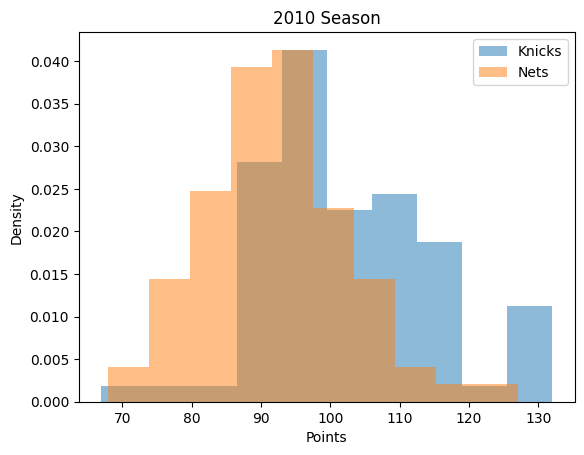

In [18]:
plt.hist(knicks_pts_10, alpha=0.5, label='Knicks', density=True)
plt.hist(nets_pts_10, alpha=0.5, label='Nets', density=True)
plt.xlabel('Points')
plt.ylabel('Density')
plt.legend()
plt.title("2010 Season")
plt.show()

The distributions shows, that the Knicks distribution is slightly shifted to the right compared to the Nets distribution. This means that the Knicks have scored more points in their games compared to the Nets. But there is also a lot of overlap between the two distributions, which means that the difference in means is not that significant.

#### 4.

Now, let’s compare the 2010 games to 2014. Replicate the steps from the previous three exercises using `nba_2014`. First, calculate the mean difference between the two teams points scored. Save and print the value as `diff_means_2014`. Did the difference in points get larger or smaller in 2014? Then, plot the overlapping histograms. Does the mean difference you calculated make sense?

In [19]:
knicks_pts_14 = nba_2014.pts[nba_2014.fran_id == 'Knicks']
nets_pts_14 = nba_2014.pts[nba_2014.fran_id == 'Nets']

In [20]:
diff_means_14 = knicks_pts_14.mean() - nets_pts_14.mean()
diff_means_14

np.float64(0.44706798131809933)

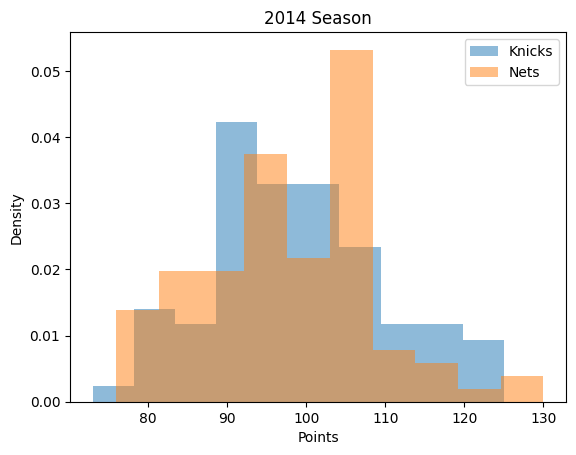

In [ ]:
plt.hist(knicks_pts_14, alpha=0.5, label='Knicks', density=True)
plt.hist(nets_pts_14, alpha=0.5, label='Nets', density=True)
plt.xlabel('Points')
plt.ylabel('Density')
plt.legend()
plt.title("2014 Season")
plt.show()

The mean difference with a value of `0.44` shows that the association between `fran_id` and `pts` is not that significant. The overlapping histograms also show that the distributions of the points scored by the two teams are almost identical. This means that the difference in means is not that significant.

It`s more identical in 2014 compared to 2010.

#### 5.

For the remainder of this project, we’ll focus on data from 2010. Let’s now include all teams in the dataset and investigate the relationship between franchise and points scored per game.

Using `nba_2010`, generate side-by-side boxplots with points scored (`pts`) on the y-axis and team (`fran_id`) on the x-axis. Is there any overlap between the boxes? Does this chart suggest that `fran_id` and `pts` are associated? Which pairs of teams, if any, earn different average scores per game?

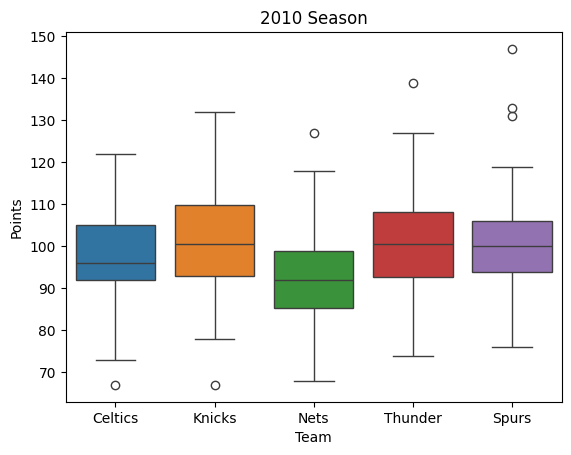

In [24]:
sns.boxplot(data=nba_2010, x='fran_id', y='pts', hue='fran_id')
plt.xlabel('Team')
plt.ylabel('Points')
plt.title('2010 Season')
plt.show()

The Teams `Celctics`, `Knicks`, `Thunder` and `Spurs` are very similar. The Team `Nets` has the lowest average points scored per game. 

`Knicks`, `Thunder` and `Spurs` have all the same median vlaue. 

#### 6.

We’d like to know if teams tend to win more games at home compared to away.

The variable `game_result` indicates whether a team won a particular game (`'W'` stands for “win” and `'L'` stands for “loss”). The variable `game_location` indicates whether a team was playing at home or away (`'H'` stands for “home” and `'A'` stands for “away”).

Data scientists will often calculate a contingency table of frequencies to help them determine if categorical variables are associated. Calculate a table of frequencies that shows the counts of `game_result` and `game_location`.

Save your result as `location_result_freq` and print your result. Based on this table, do you think the variables are associated?

In [25]:
location_result_freq = pd.crosstab(nba_2010.game_result, nba_2010.game_location)
location_result_freq

game_location,A,H
game_result,,
L,133,105
W,92,120


Yes i think the variables are associated. The table shows that the teams have won more games at home compared to away.

#### 7.

Convert this table of frequencies to a table of proportions and save the result as `location_result_proportions`. Print your result.

In [26]:
location_result_proportions = location_result_freq / len(nba_2010)
location_result_proportions

game_location,A,H
game_result,,
L,0.295556,0.233333
W,0.204444,0.266667


#### 8.

Using the contingency table we created in Task 6 (use the counts – NOT the proportions), calculate the expected contingency table (if there were no association) and the Chi-Square statistic and print your results. Does the actual contingency table look similar to the expected table — or different? Based on this output, do you think there is an association between these variables?

In [27]:
chi2, pval, dof, expected = chi2_contingency(location_result_freq)

In [28]:
expected

array([[119., 119.],
       [106., 106.]])

In [30]:
chi2, pval, dof

(np.float64(6.501704455367053), np.float64(0.010777112875193886), 1)

Yes, there is an association between the variables. The actual contingency table looks different compared to the expected table. The Chi-Square statistic is 6.5, which is significant.

#### 9.

For each game, 538 has calculated the probability that each team will win the game. We want to know if teams with a higher probability of winning (according to 538) also tend to win games by more points.

In the data, 538’s prediction is saved as `forecast`. The `point_diff` column gives the margin of victory/defeat for each team (positive values mean that the team won; negative values mean that they lost).

Using `nba_2010`, calculate the covariance between `forecast` (538’s projected win probability) and `point_diff` (the margin of victory/defeat) in the dataset. Call this `point_diff_forecast_cov`. Save and print your result. Looking at the matrix, what is the covariance between these two variables?

In [31]:
points_diff_forecast_cov = np.cov(nba_2010.forecast, nba_2010.point_diff)
points_diff_forecast_cov

array([[  0.05,   1.37],
       [  1.37, 186.56]])

The covariance between `forecast` and `point_diff` is 1,37. This means that the two variables are positively associated.

#### 10.

Because 538’s `forecast` variable is reported as a probability (not a binary), we can calculate the strength of the correlation.

Using `nba_2010`, calculate the correlation between `forecast` and `point_diff`. Call this `point_diff_forecast_corr`. Save and print your result. Does this value suggest an association between the two variables?

In [33]:
point_diff_forecast_corr, p = pearsonr(nba_2010.forecast, nba_2010.point_diff)
point_diff_forecast_corr

np.float64(0.4402088708468082)

Yes there is slightly positive association between the two variables. The correlation value is 0,44.

#### 11.

Generate a scatter plot of `forecast` (on the x-axis) and `point_diff` (on the y-axis). Does the correlation value make sense?

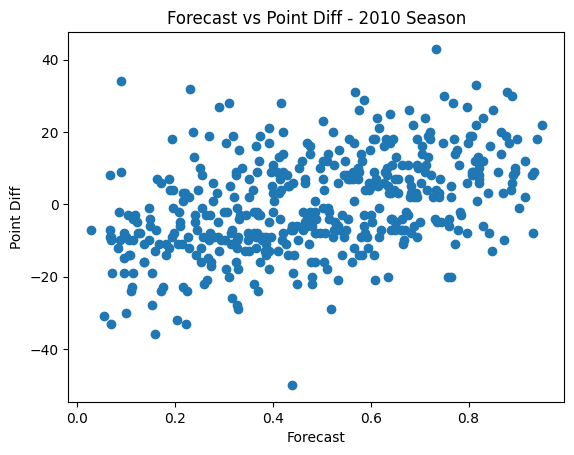

In [34]:
plt.scatter(nba_2010.forecast, nba_2010.point_diff)
plt.xlabel('Forecast')
plt.ylabel('Point Diff')
plt.title('Forecast vs Point Diff - 2010 Season')
plt.show()

Yes makes sense, you can see that the two variables are positively associated.